In [1]:
import numpy as np
import os
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
CHANNELS=3



In [3]:
test_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    horizontal_flip=True

)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Project_Tomato_Data/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 804 images belonging to 5 classes.


In [18]:
def load_model():
    # Load your trained model here
    model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Saved_models/Project_Improved_Model2.keras")
    return model

model = load_model()
evaluate = model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
evaluate

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [19]:
# Check model summary to confirm it is loaded
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           1,2

 Total params: 2,899,269 (11.06 MB)

 Trainable params: 2,898,053 (11.06 MB)

 Non-trainable params: 1,216 (4.75 KB)

# Tomato Disease Solution Inference

In [20]:
import numpy as np

import numpy as np
import matplotlib.pyplot as plt

# Define the class names for the tomato diseases
class_names = [
    "bacterial spot", "early blight", "healthy tomato", "late blight",
    "southern blight"
]

# Define the tomato disease solution function
def tomato_disease_solution(disease):
    # Print the disease for debugging
    #print("Disease detected:", disease)

    if disease == "bacterial spot":
        return (
            "Bacterial Spot Solution:\n"
            "1. Use certified disease-free seeds.\n"
            "2. Avoid overhead watering to reduce leaf wetness.\n"
            "3. Apply copper-based bactericides as a preventative measure.\n"
            "4. Remove and destroy infected plant debris.\n"
            "5. Maintain proper plant spacing for air circulation.\n"
        )

    elif disease == "early blight":
        return (
            "Early Blight Solution:\n"
            "1. Rotate crops to prevent pathogen buildup in the soil.\n"
            "2. Use resistant tomato varieties.\n"
            "3. Remove and destroy affected plant parts.\n"
            "4. Apply fungicides like chlorothalonil or copper-based sprays.\n"
            "5. Ensure proper plant spacing for good air circulation.\n"
        )

    elif disease == "healthy tomato":
        return (
            "Healthy Tomato Maintenance:\n"
            "1. Ensure proper watering - water at the base, not overhead.\n"
            "2. Use mulch to retain soil moisture and prevent soil-borne diseases.\n"
            "3. Fertilize regularly with balanced nutrients.\n"
            "4. Prune to promote good air circulation.\n"
            "5. Monitor plants regularly for any signs of disease or pests.\n"
        )

    elif disease == "late blight":
        return (
            "Late Blight Solution:\n"
            "1. Use resistant tomato varieties.\n"
            "2. Remove and destroy infected plants immediately.\n"
            "3. Apply fungicides containing mancozeb or chlorothalonil.\n"
            "4. Avoid overhead watering to minimize moisture.\n"
            "5. Practice crop rotation and soil sanitation.\n"
        )

    elif disease == "southern blight":
        return (
            "Southern Blight Solution:\n"
            "1. Rotate crops to avoid soilborne pathogens.\n"
            "2. Apply fungicides such as PCNB (pentachloronitrobenzene).\n"
            "3. Remove and destroy infected plants and debris.\n"
            "4. Use deep plowing to bury sclerotia.\n"
            "5. Maintain proper soil drainage to prevent moisture buildup.\n"
        )

    else:
        return "Unknown disease. Please provide a valid disease name."




# Function Inference

In [21]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)  # Convert image to array
    img_array = tf.expand_dims(img_array, 0)  # Add a batch dimension

    predictions = model.predict(img_array)  # Predict the class probabilities

    predicted_class_index = np.argmax(predictions[0])  # Get the index of the predicted class
    predicted_class = class_names[predicted_class_index]  # Get the class name

    confidence = round(100 * (np.max(predictions[0])), 2)  # Calculate confidence percentage

    disease_solution = tomato_disease_solution(predicted_class)  # Get disease solution

    return predicted_class, confidence, disease_solution


# Plotting of an Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


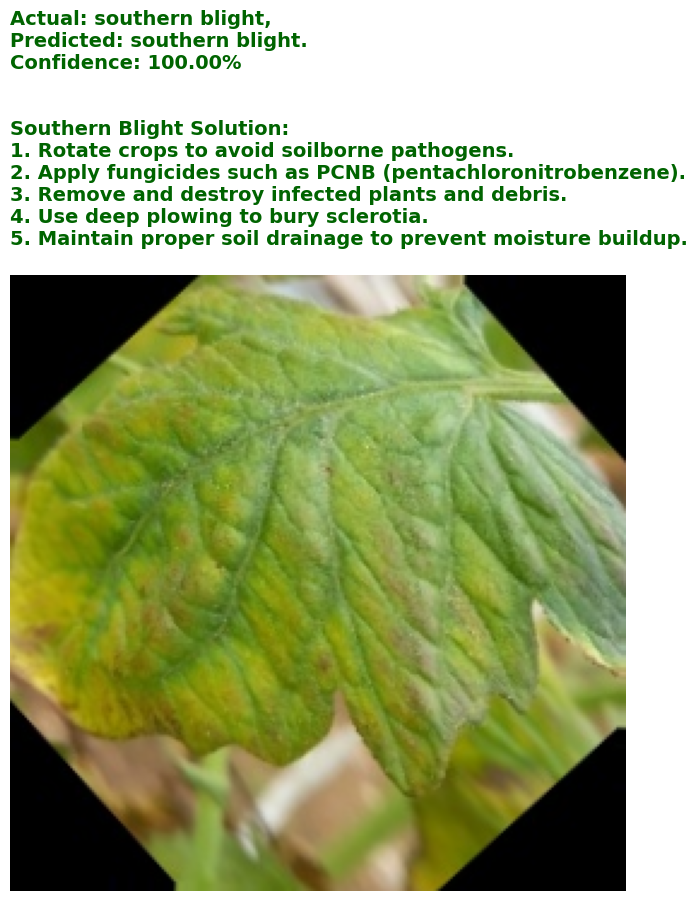

In [22]:
import matplotlib.pyplot as plt

# Assuming you have a function called `predict` that takes a model and an image as input
# and returns predicted_class, confidence, and disease_solution.

# Retrieve a batch of images and labels from the test generator
for images, labels in test_generator:
    # Select the first image and label from the batch
    image = images[0]
    label = labels[0]

    # Create a plot with a specified size
    plt.figure(figsize=(8, 8))  # Adjust the size as needed

    # Display the image
    plt.imshow(image)

    # Make a prediction for the selected image
    predicted_class, confidence, disease_solution = predict(model, image)
    actual_class = class_names[int(label)]

    # Set the title with the prediction information
    plt.title(
        f"Actual: {actual_class},\n"
        f"Predicted: {predicted_class}.\n"
        f"Confidence: {confidence:.2f}%\n\n"
        f"\n{disease_solution}",
        weight='bold',      # Bold font
        fontsize=14,        # Adjusted font size for clarity
        fontstyle='normal', # Block font
        color='darkgreen',  # Dark green color
        loc='left'          # Align title to the left
    )

    # Turn off the axis
    plt.axis("off")
    break


# Plotting of the Inference

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


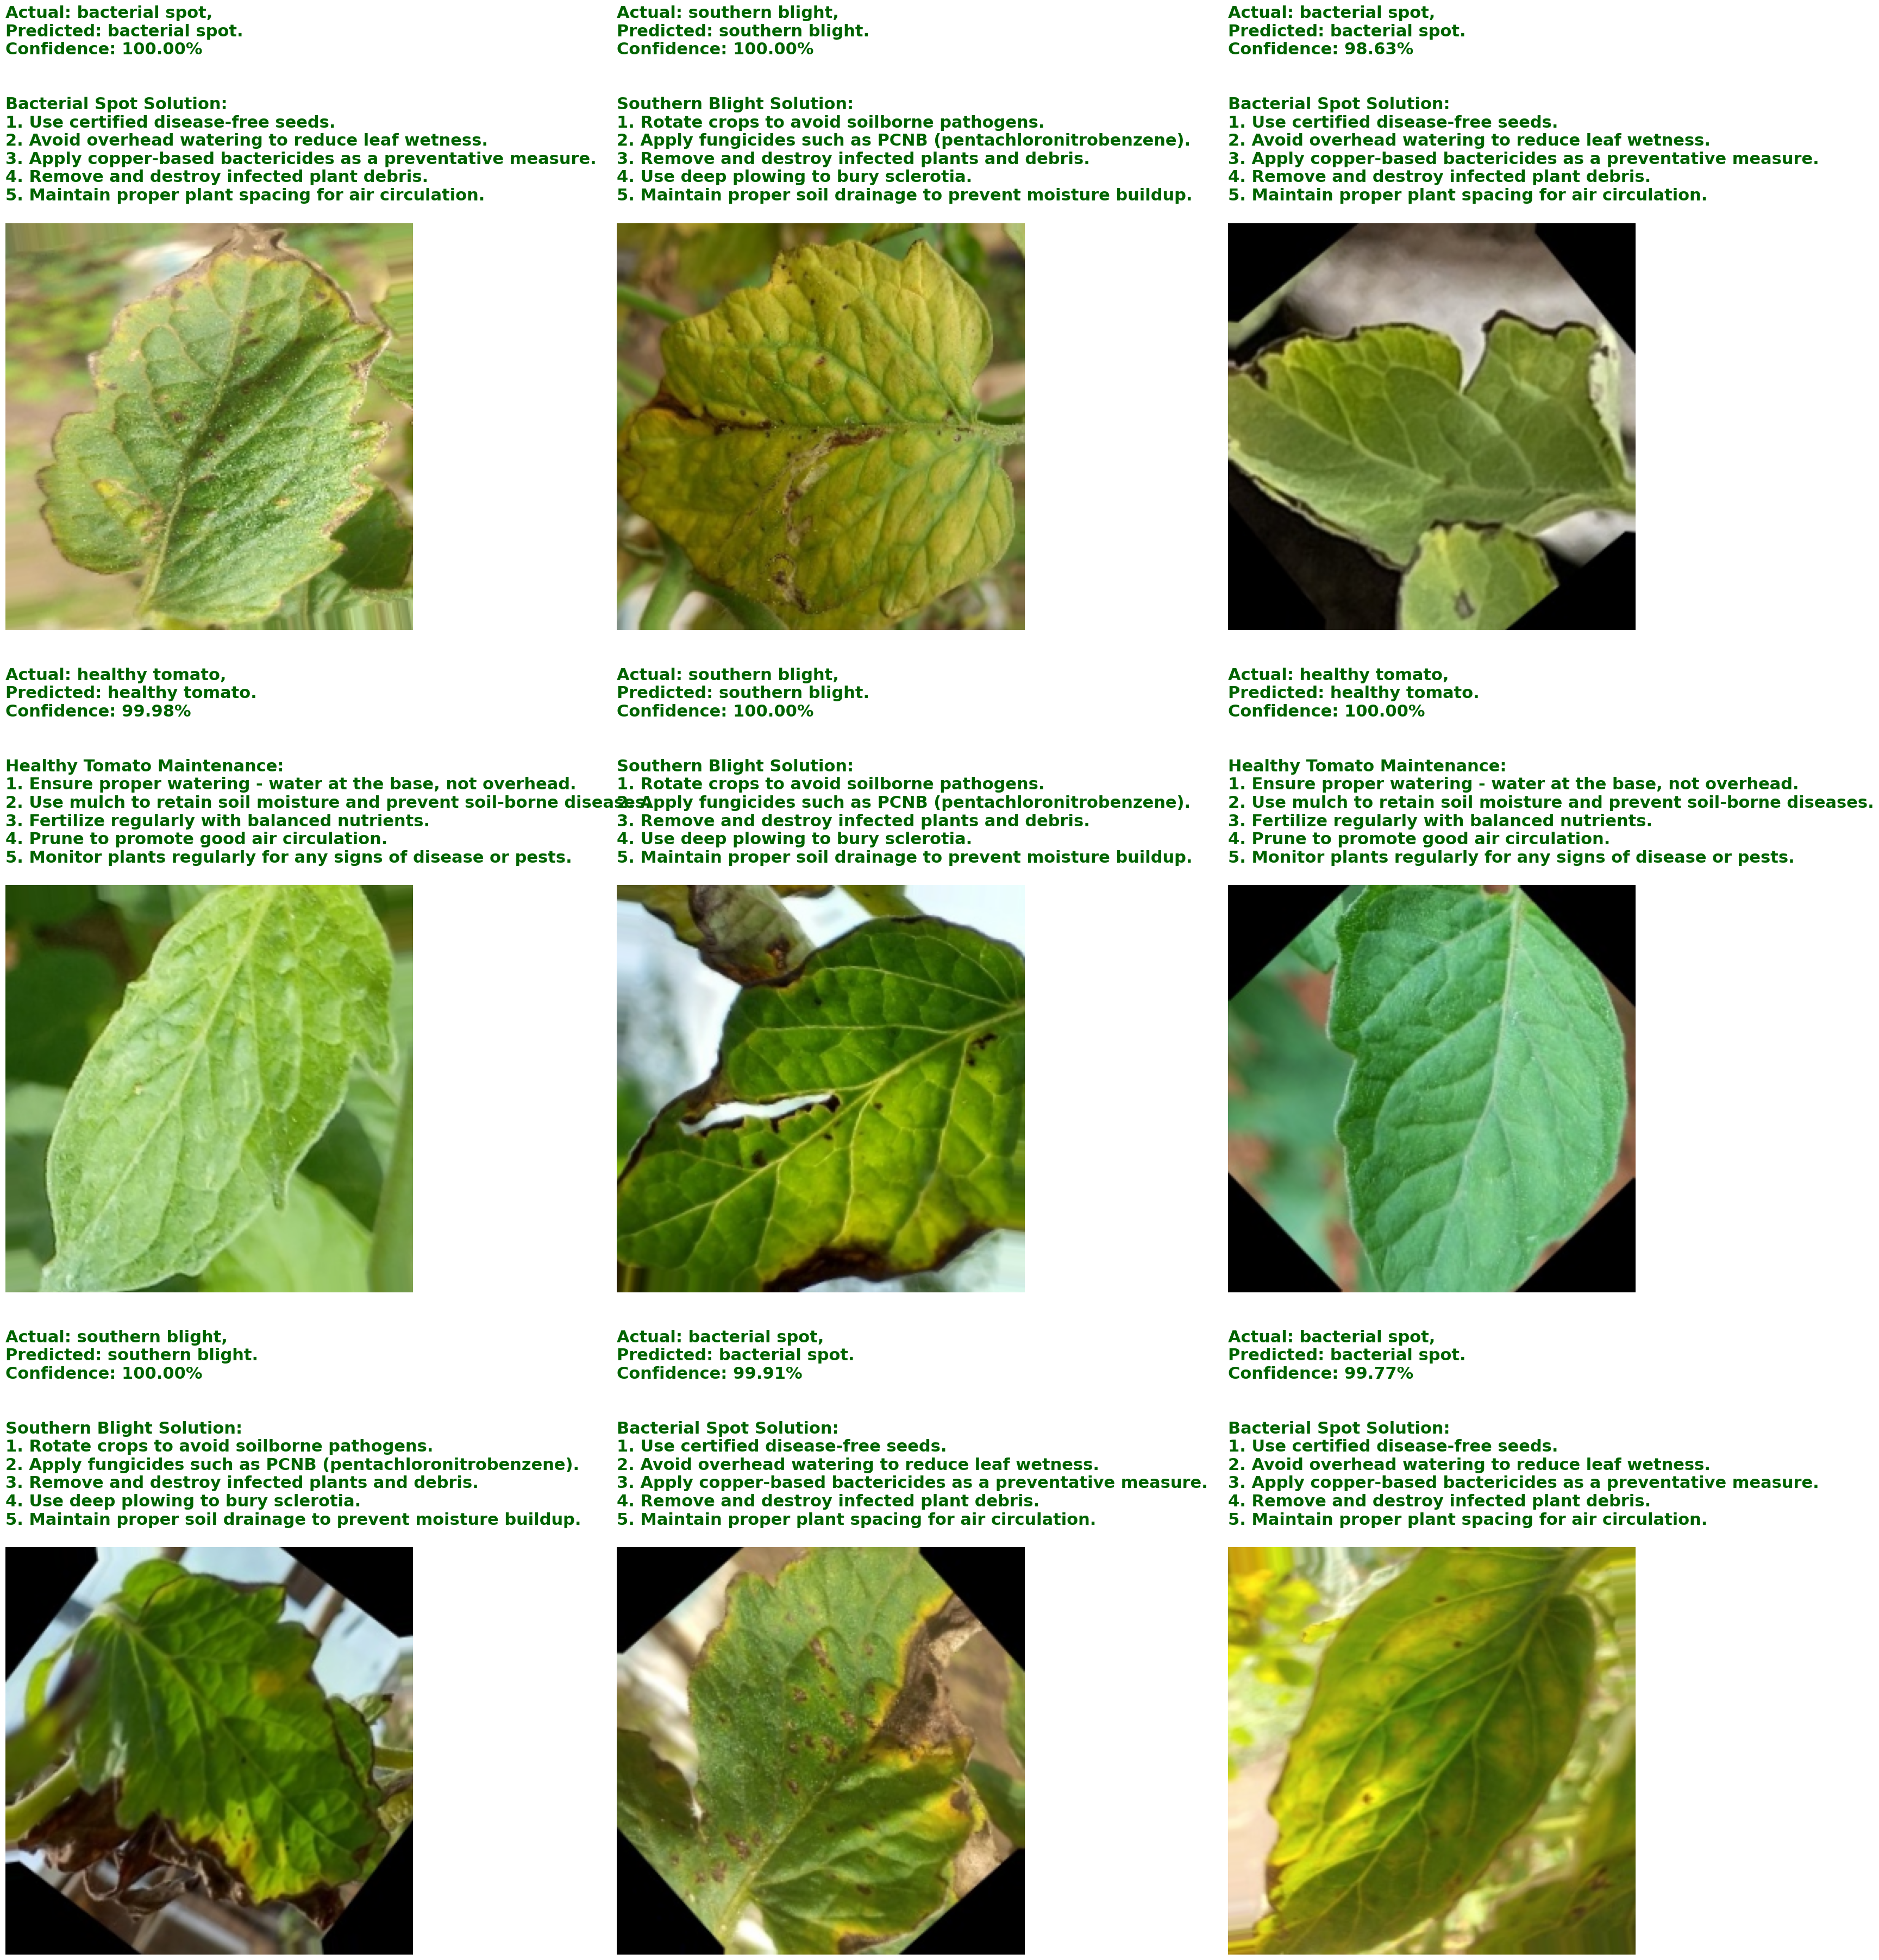

In [30]:
plt.figure(figsize=(25, 25))
plt.subplots_adjust(left=0.1, right=1.3, top=1.5, bottom=0.2, wspace=0.5, hspace=0.5)

for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence, disease_solution = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(
            f"Actual: {actual_class},\n"
            f"Predicted: {predicted_class}.\n"
            f"Confidence: {confidence:.2f}%\n\n"
            f"\n{disease_solution}",
            weight='bold',      # Bold font
            fontsize=22,        # Adjusted font size for clarity
            fontstyle='normal', # Block font
            color='darkgreen',  # Dark green color
            loc='left'          # Align title to the left
            )

        plt.axis("off")
    break



# Model Evaluation using other Metrics

In [24]:
class_name = test_generator.class_indices
class_name

{'Bacterial_Spot': 0,
 'Early_Blight': 1,
 'Healthy': 2,
 'Late_Blight': 3,
 'Southern_Blight': 4}

In [25]:
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Project_Tomato_Data/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 804 images belonging to 5 classes.


# Make Predictions on the Test Set

In [26]:
# Generate predictions
y_true = test_generator.classes  # True labels
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)  # Predicted class indices


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step


# Compute Metrics

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

# Compute classification report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Compute precision, recall, f1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None, labels=np.arange(len(class_names)), zero_division=1)

print(classification_report(y_true, y_pred, target_names=(class_names), zero_division=1))

                 precision    recall  f1-score   support

 bacterial spot       0.22      0.21      0.21       160
   early blight       0.20      0.20      0.20       160
 healthy tomato       0.25      0.25      0.25       160
    late blight       0.21      0.21      0.21       160
southern blight       0.19      0.19      0.19       164

       accuracy                           0.21       804
      macro avg       0.21      0.21      0.21       804
   weighted avg       0.21      0.21      0.21       804



# Plot Confusion Matrix

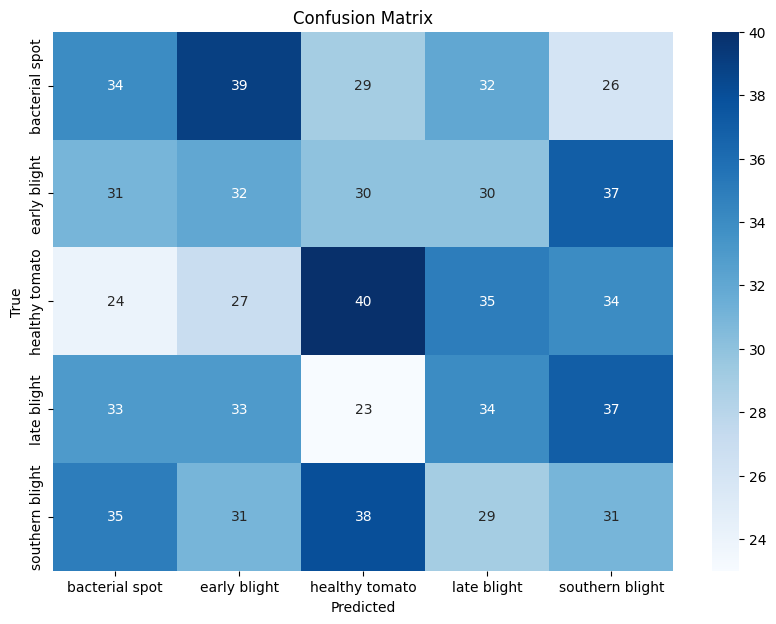

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(cm, class_names)


# Plot Precision, Recall, and F1-Score

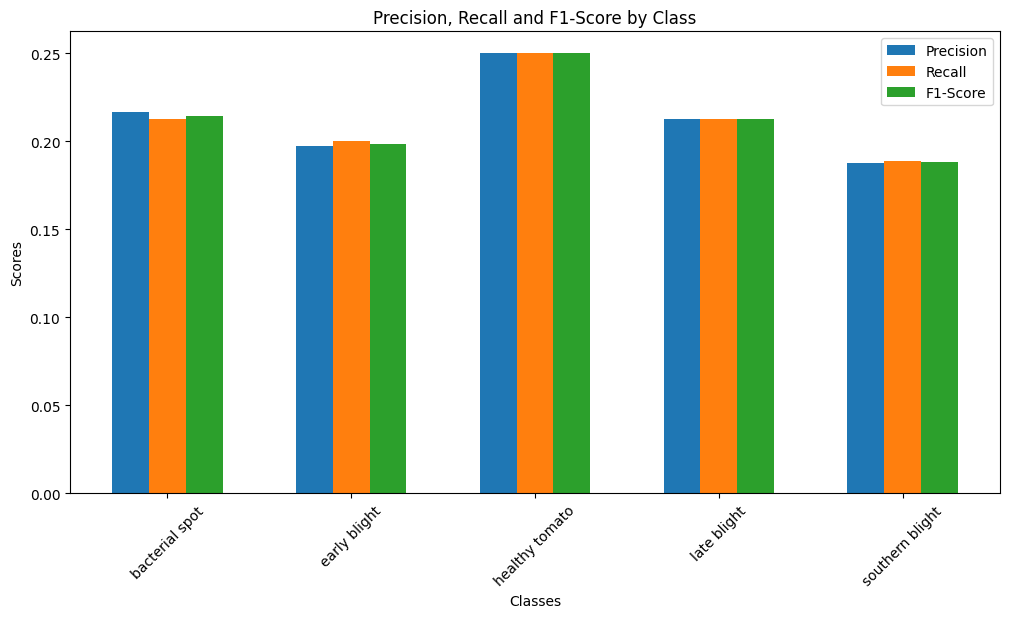

In [29]:
def plot_metrics(metrics, class_names):
    x = np.arange(len(class_names))  # The label locations
    width = 0.2  # The width of the bars

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar(x - width, metrics['precision'], width, label='Precision')
    rects2 = ax.bar(x, metrics['recall'], width, label='Recall')
    rects3 = ax.bar(x + width, metrics['f1'], width, label='F1-Score')

    ax.set_xlabel('Classes')
    ax.set_ylabel('Scores')
    ax.set_title('Precision, Recall and F1-Score by Class')
    ax.set_xticks(x)
    ax.set_xticklabels(class_names, rotation=45)
    ax.legend()

    plt.show()

metrics = {
    'precision': precision,
    'recall': recall,
    'f1': f1
}

plot_metrics(metrics, class_names)
